In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

os.getcwd()
os.chdir(r'F:\KARTIK\2021\Freezing of Gait')

In [2]:
data_path = os.path.join(
                    os.getcwd(),
                    'APPROACH - 2',
                    'features',
                    'final'
                    )
if not os.path.exists(data_path):
    print("Path Error")

In [3]:
for patient in os.listdir(data_path):
    patient_path = os.path.join(data_path, patient)
    dataset = pd.read_csv(patient_path)
    y_0 = dataset[dataset['0'] == 0]
    y_1 = dataset[dataset['0'] == 1]
    y_2 = dataset[dataset['0'] == 2]
    print(patient, len(y_0), len(y_1), len(y_2))
    

final_featuresS01R01.csv 1343 73 18
final_featuresS01R02.csv 419 22 5
final_featuresS02R01.csv 332 51 9
final_featuresS02R02.csv 866 120 15
final_featuresS03R01.csv 1106 230 43
final_featuresS03R02.csv 215 33 6
final_featuresS05R01.csv 728 250 40
final_featuresS05R02.csv 787 190 26
final_featuresS06R01.csv 1534 126 10
final_featuresS07R01.csv 1075 54 16
final_featuresS07R02.csv 417 17 8
final_featuresS08R01.csv 549 196 14
final_featuresS09R01.csv 1429 255 27


In [5]:
def get_fog(cnf):
              # For class FoG
    tp = cnf[2][2]
    tn = cnf[0][0] + cnf[0][1] + cnf[1][0] + cnf[1][1]
    fp = cnf[2][0] + cnf[2][1]
    fn = cnf[0][2] + cnf[1][2]
    
    precision = tp/(tp + fp)
    recall =  tp / (tp + fn)    #sensitivity
    F1_score = (2*tp) / (2*tp + fp + fn)
    
    return (precision, recall, F1_score)

In [6]:
def get_prefog(cnf):
             # For class pre-FoG
    tp = cnf[1][1]
    tn = cnf[0][0] + cnf[0][2] + cnf[2][0] + cnf[2][2]
    fp = cnf[1][0] + cnf[1][2]
    fn = cnf[0][1] + cnf[2][1]

    precision = tp/(tp + fp)
    recall =  tp / (tp + fn)    #sensitivity
    F1_score = (2*tp) / (2*tp + fp + fn)
    
    return (precision, recall, F1_score)

In [23]:
dataset= pd.read_csv(os.path.join(data_path, os.listdir(data_path)[3]))
y_1 = dataset[dataset['0'] == 1]

size_of_fog = len(y_1)
size_of_walk = int(1.5 * size_of_fog)

y_2 = dataset[dataset['0'] == 2]
   
recall_prefog = []
f1_prefog = []

recall_fog = []
f1_fog = []

recall_walk = []
f1_walk = []

y_0 = dataset[dataset['0'] == 0].sample(n = size_of_walk, replace = True)
dataset_2 = pd.concat([y_0, y_1, y_2], axis = 0)
dataset_2 = dataset_2.drop(['Unnamed: 0'], axis = 1)
total_features = [
        4, 19, 34, 49, 64, 79,
        8, 23, 38, 53, 68, 83,
        7, 22, 37, 52, 67, 82,
        6, 21, 36, 51, 66, 81,
        1, 16, 31, 46, 61, 76,
        172, 173, 174, 175, 176, 177, 178, 179, 180,
        154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 168, 169, 170, 171, 
        136, 137, 138, 139, 140, 141, 142, 143, 144, 
        145, 146, 147, 148, 149, 150, 151, 152, 153
]
for model_no in range(1, 10):
    no_of_ftrs = 5 * model_no
    print(no_of_ftrs)
    X = dataset_2.iloc[:, total_features[:no_of_ftrs]]
    y = dataset_2['0'].values
    #X = df.iloc[:,:-1].values
    clf = DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, train_size = 0.70)
    m = clf.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    target_names = ['WALK', "FOG", 'PreFOG']
    report = classification_report(y_test, y_pred, target_names=target_names,output_dict = True)
    recall_prefog.append(report['PreFOG']['recall'])
    recall_fog.append(report['FOG']['recall'])
    recall_walk.append(report['WALK']['recall'])

    f1_prefog.append(report['PreFOG']['f1-score'])
    f1_fog.append(report['FOG']['f1-score'])
    f1_walk.append(report['WALK']['f1-score'])

5
10
15
20
25
30
35
40
45


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


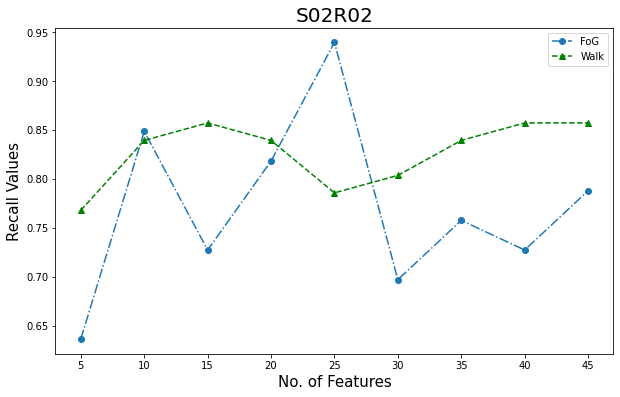

In [24]:
ftrs = [i for i in range(5, 50, 5)]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
  
plt.plot(ftrs, recall_fog, 'o', linestyle = '-.')
plt.plot(ftrs, recall_walk, '^', linestyle = '--', color = 'green')
plt.title(os.listdir(data_path)[3][14:20], fontdict = {'fontsize' : 20})
plt.xlabel("No. of Features", fontdict = {'fontsize' : 15})
plt.ylabel("Recall Values", fontdict = {'fontsize' : 15})
plt.legend(['FoG', 'Walk'])

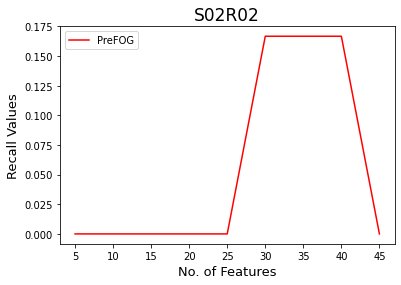

In [25]:
plt.plot(ftrs, recall_prefog, color = 'red')
plt.title(os.listdir(data_path)[3][14:20], fontdict = {'fontsize' : 17})
plt.xlabel("No. of Features", fontdict = {'fontsize' : 13})
plt.ylabel("Recall Values", fontdict = {'fontsize' : 13})
plt.legend(['PreFOG'])

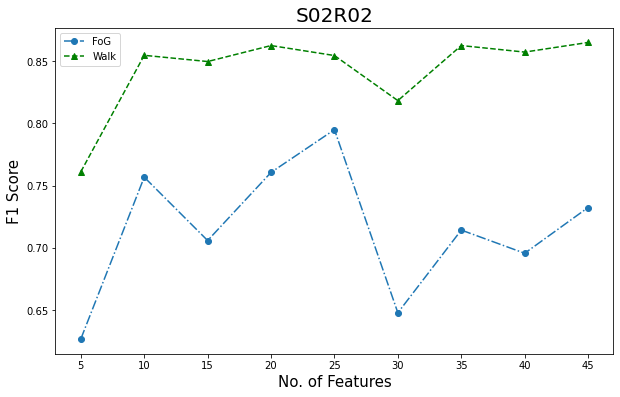

In [26]:
ftrs = [i for i in range(5, 50, 5)]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
  
plt.plot(ftrs, f1_fog, 'o', linestyle = '-.')
plt.plot(ftrs, f1_walk, '^', linestyle = '--', color = 'green')
plt.title(os.listdir(data_path)[3][14:20], fontdict = {'fontsize' : 20})
plt.xlabel("No. of Features", fontdict = {'fontsize' : 15})
plt.ylabel("F1 Score", fontdict = {'fontsize' : 15})
plt.legend(['FoG', 'Walk'])

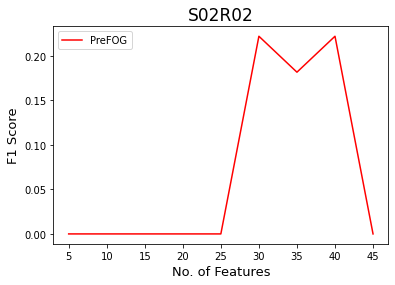

In [27]:
plt.plot(ftrs, f1_prefog, color = 'red')
plt.title(os.listdir(data_path)[3][14:20], fontdict = {'fontsize' : 17})
plt.xlabel("No. of Features", fontdict = {'fontsize' : 13})
plt.ylabel("F1 Score", fontdict = {'fontsize' : 13})
plt.legend(['PreFOG'])